In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import glob
import os

# Exercise 4

Simulation results from `init.csv`:
```
python3 main.py 365 1 init.csv planet 1
```

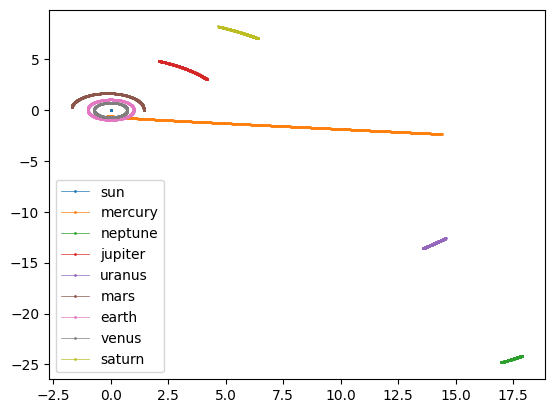

In [2]:
def read_output(file):
    df = pd.read_csv(file, names=['x','y','z','vx','vy','vz','fx','fy','fz','mass','name'], sep='\s+')
    return df

files = sorted(glob.glob("dumps/*.csv"))
dfs = [read_output(file) for file in files]

for i in dfs[0].index:
    plt.plot([df.x[i] for df in dfs], [df.y[i] for df in dfs], label=dfs[0].name[i], marker='o', markersize=1, linewidth=0.5)
plt.legend()
plt.show()

Plots from `trajectories/`:

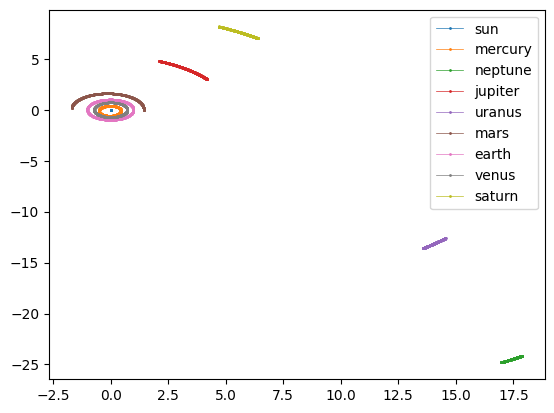

In [3]:
df_sun = pd.DataFrame([{"x":0, "y":0, "z":0, 
                       "vx":0, "vy":0, "vz":0, 
                       "fx":0, "fy":0, "fz":0,
                      "mass": 333060.401628,
                      "radius": 0.00465475876589,
                      "name": "sun"}])
def read_reference(file):
    df = pd.read_csv(file, names=['x','y','z','vx','vy','vz','fx','fy','fz','mass', 'radius', 'name'], sep='\s+', skiprows=1)
    if len(df) == 8:
        df = pd.concat([df_sun, df], ignore_index=True)
    return df


files = sorted(glob.glob("trajectories/*.csv"))
dfs=[read_reference(file) for file in files]

for i in dfs[0].index:
    plt.plot([df.x[i] for df in dfs], [df.y[i] for df in dfs], label=dfs[0].name[i], marker='o', markersize=1, linewidth=0.5)
plt.legend()
plt.show()

# Exercise 5

In [4]:
def readPositions(planet_name, directory, reference=False):
    files = glob.glob("{}/*.csv".format(directory))
    if reference:
        dfs = [read_reference(file) for file in files]
    else:
        dfs = [read_output(file) for file in files]
    df_total = pd.concat(dfs, ignore_index=True)
    positions = df_total[df_total.name == planet_name][['x', 'y', 'z']].to_numpy()
    return positions

def computeError(positions, positions_ref):
    if positions.shape != positions_ref.shape:
        raise ValueError('Dimensions of positions {0} and reference {1} do not match'.format(positions.shape, positions_ref.shape))
    else:
        return np.linalg.norm(positions - positions_ref)

# test on Mercury
positions = readPositions('mercury', 'dumps')
positions_ref = readPositions('mercury', 'trajectories', reference = True)
computeError(positions, positions_ref)

164.5567900404008

# Exercise 6

In [5]:
def generateInput(scale, planet_name, input_filename, output_filename):
    df = pd.read_csv(input_filename, sep='\s+')
    df.loc[df.name == planet_name, ['VX', 'VY', 'VZ']] = df.loc[df.name == planet_name, ['VX', 'VY', 'VZ']].apply(lambda x: x*scale)
    df.to_csv(output_filename, index=False, sep=' ')
    return

def launchParticles(input, nb_steps, freq):
    os.system('python3 main.py {0} {1} {2} planet 1'.format(nb_steps, freq, input))

def runAndComputeError(scale, planet_name, input, nb_steps, freq):
    generateInput(scale, planet_name, input, 'test.csv')
    launchParticles('test.csv', nb_steps, freq)
    positions = readPositions(planet_name, 'dumps')
    positions_ref = readPositions(planet_name, 'trajectories', reference = True)
    return computeError(positions, positions_ref)

#test on mercury
runAndComputeError(1, 'mercury', 'init.csv', 365, 1)

164.5567900404008

# Exercise 7

Optimization terminated successfully.
         Current function value: 11.363164
         Iterations: 18
         Function evaluations: 37


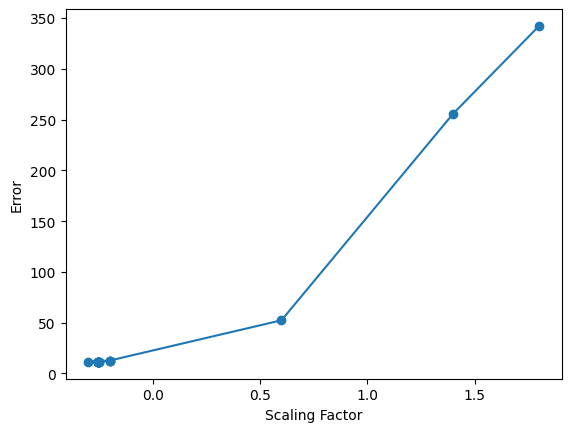

In [6]:
x_list = []
def callback(x):
    x_list.append(x[0])

xopt = optimize.fmin(runAndComputeError, args=('mercury', 'init.csv', 365, 1), x0=2, callback=callback, full_output=True)

err_list = [runAndComputeError(x, 'mercury', 'init.csv', 365, 1) for x in x_list]
plt.plot(x_list, err_list, '-o')
plt.ylabel('Error')
plt.xlabel('Scaling Factor')
plt.show()

plot of trajectories after optimization:

In [7]:
runAndComputeError(xopt[0][0], 'mercury', 'init.csv', 365, 1)
files = sorted(glob.glob("dumps/*.csv"))
dfs = [read_output(file) for file in files]

for i in dfs[0].index:
    plt.plot([df.x[i] for df in dfs], [df.y[i] for df in dfs], label=dfs[0].name[i], marker='o', markersize=1, linewidth=0.5)
plt.legend()
plt.show()